In [39]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

In [41]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [43]:
# Merge the datasets
customer_transactions = pd.merge(customers, transactions, on='CustomerID')
all_data = pd.merge(customer_transactions, products, on='ProductID')

# Feature engineering for customer segmentation
features_segmentation = all_data.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    total_quantity=('Quantity', 'sum'),
    total_value=('TotalValue', 'sum'),
    distinct_categories=('Category', 'nunique')
).reset_index()

In [45]:
# Standardize the features for customer segmentation
scaler = StandardScaler()
scaled_features_segmentation = scaler.fit_transform(features_segmentation.drop('CustomerID', axis=1))

In [47]:
# Perform customer segmentation using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_assignments = pd.DataFrame({'CustomerID': features_segmentation['CustomerID'], 'cluster': kmeans.fit_predict(scaled_features_segmentation)})

# Merge cluster assignments with the customers dataframe
customers = pd.merge(customers, cluster_assignments, on='CustomerID')

C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


DB Index: 1.0159
Silhouette Score: 0.3343
Calinski-Harabasz Index: 179.7284


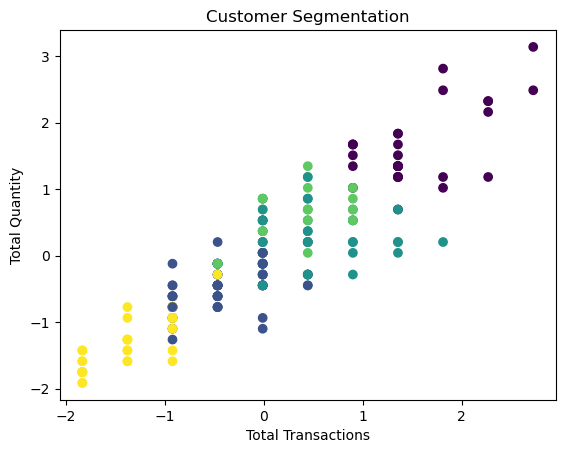

In [49]:
# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_features_segmentation, customers['cluster'])
silhouette = silhouette_score(scaled_features_segmentation, customers['cluster'])
calinski_harabasz = calinski_harabasz_score(scaled_features_segmentation, customers['cluster'])

# Print clustering metrics
print(f"DB Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

# Visualize the clusters
plt.scatter(scaled_features_segmentation[:, 0], scaled_features_segmentation[:, 1], c=customers['cluster'])
plt.title('Customer Segmentation')
plt.xlabel('Total Transactions')
plt.ylabel('Total Quantity')
plt.show()